# Programmation linéaire

<div class="alert alert-danger">
Attention: veillez à exécuter (CTRL-ENTREE) les portions de code dans l'ordre où elles apparaissent.
    
Pour écrire vos réponses dans des cellules de texte, double-cliquez dessus.
<div>

### Binôme:
> 1. Nom Prénom groupe:
> 2. Nom Prénom groupe:


## Exercice 1

Considérons le problème de programmation linéaire suivant:

\begin{alignat*}{3}
(\mathcal{P})\qquad\qquad \max z=4 x_1 &+3x_2 &&\\
\text{Sous les contraintes}& &&\\
x_1& &&\leq \hphantom{1}8 \qquad (1)\\
x_1 &+2x_2 &&\leq 15 \qquad (2)\\
2x_1 &+\hphantom{2}x_2 &&\leq 18 \qquad (3)\\
& \hphantom{+\_2}x_j &&\geq \hphantom{1}0 \qquad j = 1,2.
\end{alignat*}

Le problème est écrit sous *forme canonique*: maximisation sous contraintes inégalités $\leq$ et variables positives ou nulles.

### 1. Ensemble des solutions admissibles

Dans le code Python ci-dessous, la classe `LPVisu()` permet de tracer l'ensemble des solutions admissibles du problème. Il correspond à l'intersection des demi-espaces définis par les contraintes du problème.

Le problème est énoncé sous la forme 
\begin{alignat*}{3}
\max z&=c^T x\\
\text{Sous les contraintes}&\\
Ax &\leq b \\
x_j &\geq 0 \qquad j = 1,2.
\end{alignat*}

La matrice `A` est ici la matrice des coefficients associés aux variables $x_1$ et $x_2$ dans les contraintes (1), (2) et (3). Le vecteur `b` correspond à la partie droite des contraintes et le vecteur `c` aux coefficients des variables dans la fonction objectif.

<div class="alert alert-warning">
Exécutez (CTRL-ENTREE) le code ci-dessous.  

Dans le code donné, seule la contrainte (2) a été représentée. Modifiez la définition des paramètres A, b et c pour faire apparaître l'ensemble des solutions admissibles du problème.
</div>

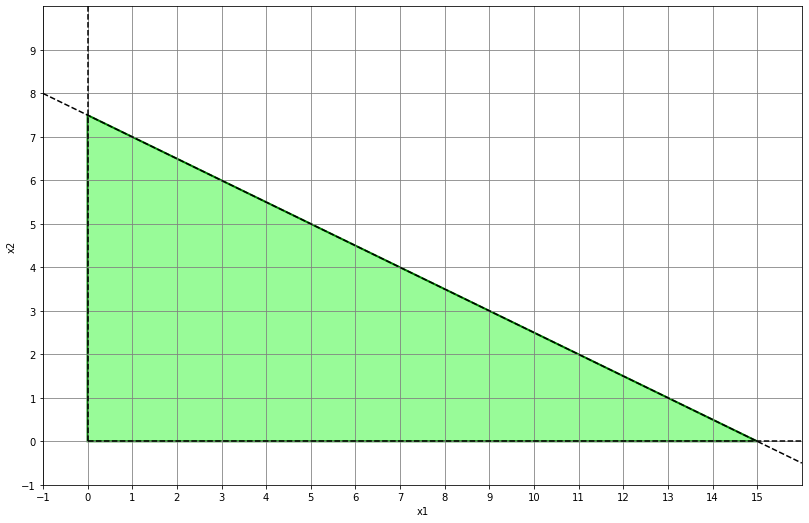

In [3]:
%matplotlib inline
from lp_visu import LPVisu

# problem definition
A = [[1.0, 2.0]]
b = [15.0]
c = [4.0, 3.0]

x1_bounds     = (0, None)
x2_bounds     = (0, None)

# GUI bounds
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              scale = 0.8)

Les sommets du polyèdre sont les points situés à l'intersection de deux bornes de contraintes inégalités (dans $\mathbb{R}^2$, si on était dans $\mathbb{R}^n$ il faudrait $n$ contraintes). Ils doivent en plus respecter toutes les autres contraintes pour être un sommet du polyèdre.

<div class="alert alert-warning">
Dans l'exemple étudié, donnez le nombre d'intersections et le nombre de sommets du polyèdre.
</div>

Réponse:
   > Nombre d'intersections:
   
   > Nombre de sommets:

### 2. Résolution graphique

Dans ce problème de maximisation, on doit trouver le(s) point(s) de l'ensemble des solutions admissibles qui donnent la plus grande valeur du critère $z=c^Tx$. Nous avons vu en cours que si une solution optimale existe, au moins un sommet du polyèdre est solution optimale.

<div class="alert alert-warning">
Ajouter l'argument `obj` à `LPVisu()` permet de tracer, pour une valeur donnée $z_0$, la droite des points $x$ tels que $c^Tx=z_0$ (en rouge sur le graphique). Faites varier la valeur de $z_0$ afin de déterminer graphiquement la solution optimale du problème.
</div>

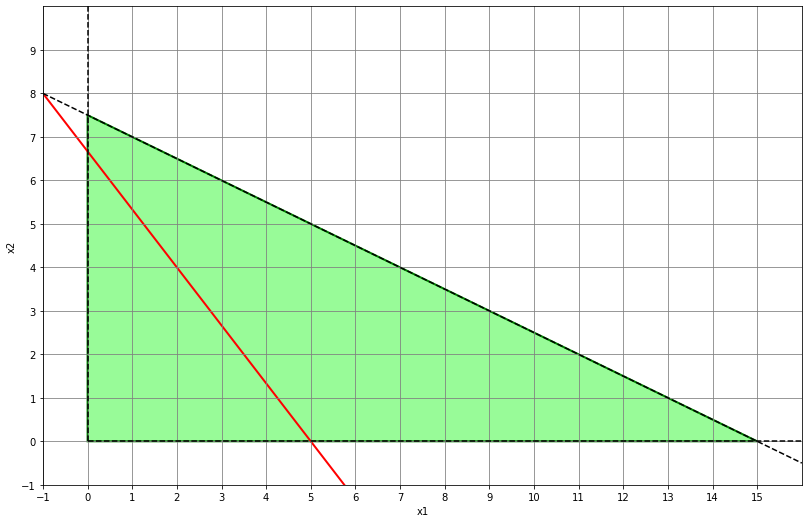

In [4]:
z0=20

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              scale = 0.8,
              obj = z0)

Réponse:
   > Sommet optimal: 
   
   > Contraintes saturées au sommet optimal:
   
   > Contraintes non saturées au sommet optimal et marges associées:
   
   > Valeur du critère optimal $z^*$:

### 3. Passage en forme standard

Afin de décrire le problème à l'aide de contraintes égalités, nous allons modifier les contraintes (1), (2) et (3) en ajoutant des variables d'écart. Nous allons donc **ajouter des colonnes** à la matrice $A$. Le nouveau problème s'écrit:
\begin{alignat*}{3}
(\mathcal{P})\qquad\qquad \max z=c^Tx\\
\text{Sous les contraintes}&\\
Ax &\color{red}=\color{black} b\\
\hphantom{A}x &\geq \hphantom{1}0
\end{alignat*}

où $A$ est désormais une matrice de dimensions $m\times p$ et $c$ et $x$ des vecteurs de dimension $p$.

<div class="alert alert-warning">
Transformez les contraintes inégalités (1), (2) et (3) en contraintes égalités en ajoutant des variables d'écart.

Donnez ci-dessous la nouvelle matrice $A$ et le nouveau vecteur $c$.
Exécutez le code de cette cellule.
</div>

In [2]:
import numpy as np
A = np.array([])
b = np.array([])
c = np.array([])

Dans cette partie, **on ne cherche pas à résoudre le problème**. On va juste parcourir quelques solutions de base pour les comparer.

#### Base de départ

Les colonnes ajoutées dans $A$ permettent de trouver une $base$, sous-matrice $m\times m$ inversible de $A$. Cette base de départ, notée $B_0$ est évidente et se trouve déjà sous la forme d'une sous-matrice identité dans $A$.

Le problème est donc déjà sous *forme simpliciale*. Pour trouver la solution de base associée, il suffit de fixer les valeurs des variables hors base à 0.

<div class="alert alert-warning">
Indiquez quelles sont les variables de base associées à $B_0$ et les variables hors base.
    
Donnez leurs valeurs à la solution de base (écrivez le vecteur $x$ en entier)
    
Donnez la valeur de l'objectif en ce point.
</div>

Réponse:
   > Variables de base:
   
   > Variables hors base:

   > Solution de base: x=
   
   > Valeur de la fonction objectif:

#### Base quelconque

Soit une base $B$ de la matrice $A$. On réorganise les colonnes de $A$ sous la forme $[B|N]$ (où $N$ représente donc les colonnes de $A$ qui ne sont pas dans la base $B$), ainsi que les lignes de $x$ sous la forme $x_B$ et $x_N$, variables de base et variables hors base. Le système s’écrit: 
$$Ax = Bx_B + Nx_N = b$$

En multipliant de part et d'autre par $B^{-1}$, on obtient un système équivalent. Il est sous la forme simpliciale par rapport à la base $B$:
$$x_B=B^{-1}b-B^{-1}Nx_N$$

De la même manière, la fonction objectif $z=c^Tx$ se récrit:
$$z=c_B^TB^{-1}b+(c_N^T-c_B^TB^{-1}N)x_N$$

A la solution de base associée à $B$, les variables hors base $x_N$ sont **fixées à 0**. Les variables de base valent donc:
$$x_B=B^{-1}b$$
et la fonction objectif vaut:
$$z=c_B^TB^{-1}b$$


<div class="alert alert-warning">
Considérons la base $B_1$ correspondant aux colonnes 1, 2 et 4 de $A$. Le code ci-dessous calcule les valeurs de la solution de base associée à $B_1$ et de l'objectif correspondant.
    
Lisez puis exécutez le code ci-dessous sans le modifier.
</div>

In [6]:
import numpy.linalg as npla

# Colonnes de la base
col = [1,2,4]

# Base: extraction des colonnes choisies dans la matrice A
B1 =  A[:,[ col[0]-1, col[1]-1, col[2]-1]]

print("B1=",B1)

# Coefficients des variables de base dans la fonction objectif (extraction dans le vecteur c)
cB1=c[[ col[0]-1, col[1]-1, col[2]-1]]

print("cB1=",cB1)

# Valeurs des variables de base à la solution de base
xB1 = npla.inv(B1)@b
print("xB1=",xB1)

# Valeur de la fonction objectif à la solution de base
zB1 = cB1@xB1
print("zB1=",zB1)

B1= [[1. 0. 0.]
 [1. 2. 1.]
 [2. 1. 0.]]
cB1= [4. 3. 0.]
xB1= [8. 2. 3.]
zB1= 38.0


Les variables de base sont $x_1$, $x_2$ et $x_4$ pour la base $B_1$. A la solution de base, leur valeur respective est 8, 2, 3. 

Les variables hors base $x_3$ et $x_5$ sont nulles à la solution de base. Ces deux variables sont les variables d'écart associées aux contraintes (1) et (3). Ainsi, on retrouve bien que cette solution de base correspond à un sommet du polyèdre, intersection des bornes des contraintes (1) et (3). En ce point la contrainte (2) n'est pas saturée, l'écart à sa borne vaut $x_4=3$.

Repérez ce point sur le graphique de la question 1.

<div class="alert alert-warning">
Refaites le calcul pour la base $B_2$ correspondant aux colonnes 1, 2 et 5 de $A$. Utilisez la cellule de code ci-dessous.  

Donnez les résultats et commentez-les (aidez-vous du tracé de l'ensemble des solutions admissibles).
</div>

In [15]:
# Colonnes de la base
col = []

B2 =  A[:,[ col[0]-1, col[1]-1, col[2]-1]]

print("B2=",B2)

cB2=c[[ col[0]-1, col[1]-1, col[2]-1]]

print("cB2=",cB2)

xB2 =  npla.inv(B2)@b
print("xB2=",xB2)

zB2 =  cB2@xB2
print("zB2=",zB2)

IndexError: list index out of range

Réponse: 

<div class="alert alert-warning">
Refaites le calcul pour la base $B_3$ correspondant aux colonnes 2, 4 et 5 de $A$. Utilisez la cellule de code ci-dessous.  

Donnez les résultats et commentez-les (aidez-vous du tracé de l'ensemble des solutions admissibles).
</div>

In [1]:
# Colonnes de la base
col = []

B3 = A[:,[ col[0]-1, col[1]-1, col[2]-1]]

print("B3=",B3)

cB3=c[[ col[0]-1, col[1]-1, col[2]-1]]

print("cB3=",cB3)

xB3 = npla.inv(B3)@b
print("xB3=",xB3)

zB3 = cB3@xB3
print("zB3=",zB3)

NameError: name 'A' is not defined

Quelle indication est-elle donnée par LinAlg ? A quoi cela correspond-il ?

Situez sur le graphique de la question 1 le sommet défini par la base B3 et faites le lien avec la réponse obtenue.


Réponse:

<div class="alert alert-warning">
Combien de bases potentielles peut-on trouver dans la matrice A ? Est-ce cohérent avec le nombre d'intersections trouvé à la question 1 ?
</div>

Réponse:

### 4. Résolution par l'algorithme du simplexe

La bibliothèque `scipy` propose une fonction `linprog()` qui permet de résoudre des problèmes de programmation linéaire sous contraintes égalité et inégalité. Pour plus d'informations sur cette fonction, consulter la [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).

Nous présentons ci-dessous la résolution de notre problème. Par simplicité, nous sommes revenus à la forme canonique, mais la forme standard marcherait aussi bien. La fonction `lp_simple_callback()` permet d'afficher les résultats intermédiaires, à chaque itération de l'algorithme du simplexe. L'argument `xk` de `LPVisu()` permet de visualiser le sommet courant.

Le premier argument passé à `linprog()` est `-c`. En effet `linprog()` effectue par défaut une minimisation. Par conséquent, pour maximiser $z=c^Tx$, il faudra minimiser $-z=-c^Tx$.

Les arguments A_ub et b_ub correspondent à la matrice $A$ et la partie droite des contraintes $b$ dans le cas de contraintes inégalités $\leq$. D'autres arguments existent pour les contraintes égalités. Par défaut les variables sont considérées positives ou nulles.

<div class="alert alert-warning">
Lisez puis exécutez le code ci-dessous sans le modifier.
</div>

Itération 0:
Coordonnées du sommet courant: [0. 0.]
Variables d'écart: [ 8. 15. 18.]
Valeur de la fonction objectif: -0.0


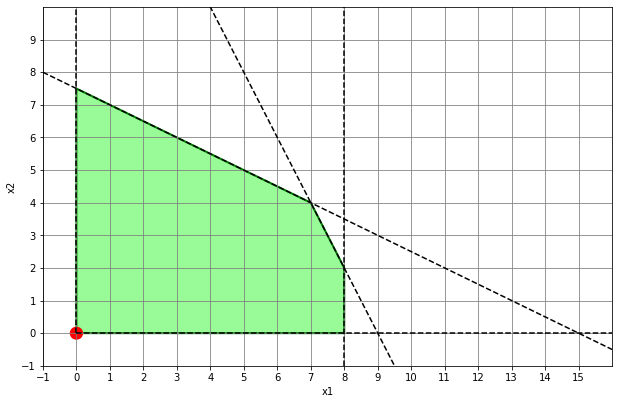

Itération 1:
Coordonnées du sommet courant: [8. 0.]
Variables d'écart: [0. 7. 2.]
Valeur de la fonction objectif: 32.0


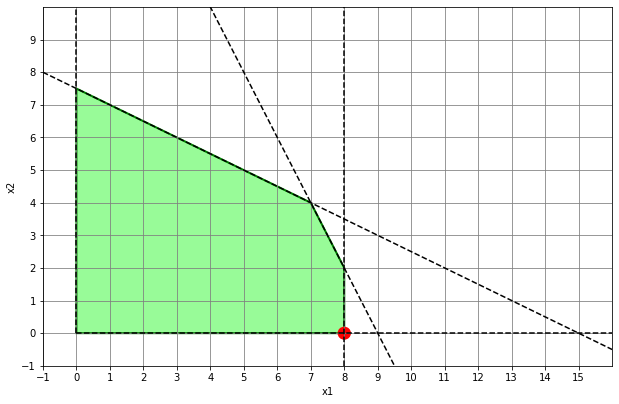

Itération 2:
Coordonnées du sommet courant: [8. 2.]
Variables d'écart: [0. 3. 0.]
Valeur de la fonction objectif: 38.0


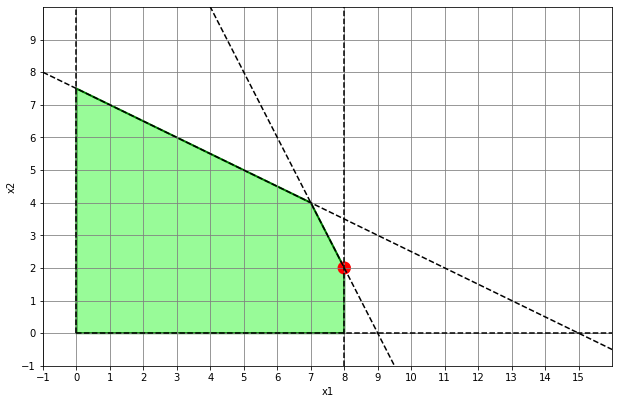

Itération 3:
Coordonnées du sommet courant: [7. 4.]
Variables d'écart: [1. 0. 0.]
Valeur de la fonction objectif: 40.0


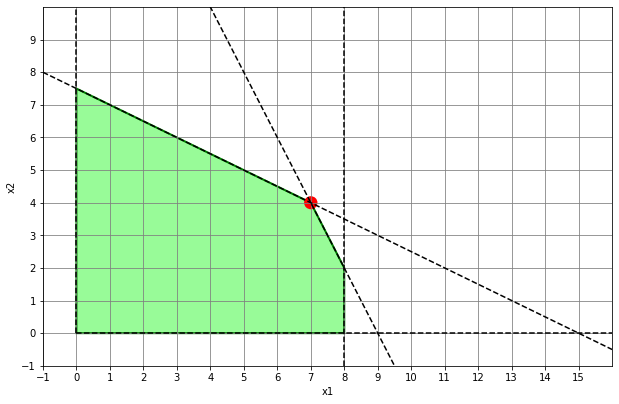

     con: array([], dtype=float64)
     fun: -40.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1., 0., 0.])
  status: 0
 success: True
       x: array([7., 4.])


In [7]:
from scipy.optimize import linprog
import numpy as np
import math

# Définition du problème
A = [[1.0, 0.0], 
     [1.0, 2.0], 
     [2.0, 1.0]]
b = [8.0, 15.0, 18.0]
c = np.array([4.0, 3.0])

# Bornes sur les valeurs des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Bornes pour l'affichage
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

def lp_simple_callback(optimizeResult):
    """A simple callback function to see what is happening to print each
    step of the algorithm and to use the visualization.

    """
    if optimizeResult["phase"]==1:
        print("Itération " + str(optimizeResult["nit"]) + ":")
        print("Coordonnées du sommet courant: " + str(optimizeResult["x"]))
        print("Variables d'écart: " + str(optimizeResult["slack"]))
        print("Valeur de la fonction objectif: " + str(-1*optimizeResult["fun"]))

        visu = LPVisu(A, b, c,
                      x1_bounds, x2_bounds,
                      x1_gui_bounds, x2_gui_bounds,
                      scale = 0.6, pivot_scale = 2.0,
                      xk = optimizeResult["x"])

# Résolution du problème
res = linprog(-c, A_ub=A, b_ub=b, bounds = (x1_bounds, x2_bounds),
              method='simplex',
              callback=lp_simple_callback)

print(res)

<div class="alert alert-warning">
L'algorithme part du point (0,0), sommet correspondant à la solution de base associée à $B_0$, la base évidente que nous avions trouvée. Observez les résultats des itérations et suivez le cheminement du sommet courant.
<div class>

### Stratégie de résolution

Le temps de calcul de l'algorithme du simplexe est lié au nombre d'itérations (pivots) réalisés pour atteindre la solution optimale. A chaque itération, on se retrouve sur un sommet du polyèdre qui correspond à la solution de base courante. Si ce sommet n'est pas optimal, il faut pivoter pour changer de base et se déplacer vers un sommet voisin.

Le guidage de la recherche vise à sélectionner le sommet voisin le plus prometteur, c'est-à-dire celui qui mènera le plus vite à la solution optimale. Pour cela, on utilise des *heuristiques* de choix. Deux heuristiques traditionnelles sont:
* On fait entrer dans la base la variable qui a le plus fort coût réduit. Cela correspond à sélectionner l'arête du polyèdre qui va le plus dans la direction du gradient.
* On fait entrer dans la base la variable qui mène au sommet qui possède la plus grande valeur de $z$. Remarque: cela oblige à calculer cette valeur pour chaque sommet voisin, ce qui consomme du temps de calcul.


<div class="alert alert-warning">
Reprenez le schéma de la résolution par la fonction `linprog()` depuis le sommet initial. Y a-t-il un chemin permettant d'atteindre le sommet optimal plus rapidement ?
<div class>

Réponse: 

<div class="alert alert-warning">
A partir des éléments associés au tableau initial, déterminez le sommet sélectionné par chacune des heuristiques données ci-dessus.
<div class>

**Première heuristique:** comparaison des coûts réduits associés aux variables hors base.

Réponse: 

**Seconde heuristique:**
> *Première possibilité: faire un pivot du simplexe comme vu en cours, en faisant entrer dans la base $x_1$ pour  trouver le nouveau sommet et la valeur de l'objectif, puis on recommencer en faisant entrer $x_2$ et on compare les deux sommets.*

> *Sinon on peut réutiliser ce qui a été fait à la question 3 pour trouver les deux sommets et les comparer.*

Réponse: 

## Exercice 2: fabrication d'un acier spécial

[Prins & Sevaux 2011]

L'entreprise Steel a reçu une commande de 5 tonnes d'acier spécial destiné à la fabrication de coques de bateaux. Cet acier doit avoir les caractéristiques particulières du tableau 1 ci-dessous:

**Tableau 1: Caractéristiques de l'acier commandé**

| Elément chimique | Pourcentage minimal | Pourcentage maximal |
|------------------|:-------------------:|:-------------------:|
| Carbone (C)      | 2                   | 3                   |
| Cuivre (Cu)      | 0,4                 | 0,6                 |
| Manganèse (Mn)   | 1,2                 | 1,65                |

Pour fabriquer cet acier, Steel dispose de sept matières premières dont les caractéristiques, les quantités disponibles et les coûts d'achat sont donnés dans le tableau 2 ci-dessous. 

**Tableau 2: Caractéristiques, stocks et coûts d'achat des matières premières**

| Matière première      |  C% | Cu%  | Mn% | Stock dispo (kg) | coût (€/kg) |
|-----------------------|:---:|:----:|:---:|:----------------:|:-----------:|
| Alliage de fer 1      | 2,5 | 0    | 1,3 | 4000             | 1,20        |
| Alliage de fer 2      | 3   | 0    | 0,8 | 3000             | 1,50        |
| Alliage de fer 3      | 0   | 0,3  | 0   | 6000             | 0,90        |
| Alliage de cuivre 1   | 0   | 90   | 0   | 5000             | 1,30        |
| Alliage de cuivre 2   | 0   | 96   | 4   | 2000             | 1,45        |
| Alliage d'aluminium 1 | 0   | 0,4  | 1,2 | 3000             | 1,20        |
| Alliage d'aluminium 2 | 0   | 0,6  | 0   | 2500             | 1,00        |

On veut déterminer la composition de l'acier à fabriquer pour minimiser les coûts de production.

<div class="alert alert-warning">
Modéliser le problème en programmation linéaire. Pour cela:

> 1. Choisissez des variables de décision

> 2. Ecrivez la fonction objectif et les contraintes du problème

<div class>

Modèle:

> Description des variables choisies: 

> Objectif:

> Contraintes:

<div class="alert alert-warning">
A l'aide de la fonction linprog() de scipy, résolvez le problème.

Transformez les contraintes $\geq$ en contraintes $\leq$, puis agrégez toutes les contraintes inégalités afin de les passer ensemble par les arguments A_ub et b_ub de linprog. On se servira des différentes fonctions disponibles dans numpy (np.one, np.eye, np.transpose, np.r_, etc.)

De même, utilisez les arguments A_eq et b_eq pour les contraintes égalités.

In [3]:
import numpy as np
from scipy.optimize import linprog

# Demande en acier
D=5.
# Nombre d'éléments mesurés dans les caractéristiques
ne = 3
# Caractéristiques de l'acier (pourcentage min/max de chaque élément)
Tmin=np.array([ 2, 0.4, 1.20])
Tmax=np.array([ 3, 0.6, 1.65])

# Nombre d'alliages disponibles
na = 7
# Caractéristiques des alliages (pourcentage de chaque élément)
T = np.array(
[[  2.5,   0. ,   1.3],
 [  3. ,   0. ,   0.8],
 [  0. ,   0.3,   0. ],
 [  0. ,  90. ,   0. ],
 [  0. ,  96. ,   4. ],
 [  0. ,   0.4,   1.2],
 [  0. ,   0.6,   0. ]])
# Quantités disponibles des alliages
QD = np.array([4,3,6,5,2,3,2.5])
# Coût des alliages
C = np.array([1.2,1.5,0.9,1.3,1.45,1.2,1])


Résultats:

> Solution optimale: 

> Valeur du critère:

Commentaires: